In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [260]:
#data sets
leagues_file = "../../../data/team_player/cleaned_final/leagues.csv"
leagues_df = pd.read_csv(leagues_file)
del leagues_df["Unnamed: 0"]
leagues_df.dropna(inplace=True)
leagues_df.head()

,Ranking,Year,Teams,Points,Goals+,Goals-,avg age,avg heights (cm),avg weight (kg),avg player rating,...,avg player wage,Shots pg,Yellowcard,RedCard,Possession%,Pass%,AerialsWon,Country,Transfer Spend (Euros),MA
0,20,2020,Osasuna,11.0,10.000000,18.000000,0.0,0.0,0.0,71.666667,...,0.0,9.6,27,1,42.5,68.1,30.3,Spain,0.0,0.000000
1,1,2020,AC Milan,28.0,37.428571,26.285714,0.0,0.0,0.0,74.317073,...,0.0,15.6,29,0,50.7,82.9,17.8,Italy,0.0,70.952857
2,20,2020,Crotone,6.0,10.000000,25.000000,0.0,0.0,0.0,65.117647,...,0.0,9.3,31,3,48.9,80.9,10.3,Italy,0.0,0.000000
3,19,2020,Torino,6.0,34.714286,33.714286,0.0,0.0,0.0,71.645161,...,0.0,10.9,25,2,47.3,82.6,11.7,Italy,0.0,21.850000
4,18,2020,Genoa,7.0,31.142857,33.714286,0.0,0.0,0.0,69.902439,...,0.0,8.6,27,1,45.3,78.2,13.0,Italy,0.0,18.680000


In [269]:
leagues_df.iloc[[124]]["MA"]

124    19.32
Name: MA, dtype: float64

In [261]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set_theme(style="white")
# # Compute the correlation matrix
# corr = leagues_df.corr()
# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(50, 50, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# #sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
# #            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# sns.heatmap(corr,vmin=-1, vmax=1, annot=True,mask=mask,fmt='.2g')
# plt.tight_layout()
# plt.title("Correlation matrix", fontdict={"size": 25, "color":"white"},pad=-5)
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='black')
# ax.yaxis.label.set_color('black')
# ax.tick_params(axis='y', colors='black')
# plt.savefig("../../../images/heatmap.png", transparent=True)
#final_df.corr()["Ranking"]

In [37]:
leagues_corr = leagues_df.corr()
leagues_corr.to_csv("../../../data/team_player/cleaned_final/correlation.csv",header=True,index=False)

In [242]:
df_final = leagues_df[leagues]
X1 = df_final[["avg player rating",'Possession%',"Shots pg","Pass%","Goals+","MA","Goals-"]]
y_pred = regressor.predict(X1)

ValueError: X has 5 features per sample; expecting 7

In [262]:
#divide the data into attributes (independent variable X), labels(dependent variable, the prediction, y)
X = leagues_df[["avg player rating",'Possession%',"Shots pg","Pass%","Goals+","MA","Goals-"]]
y = leagues_df["Ranking"]
# xx = leagues_df[["Shots pg",'Possession%',"Pass%","avg player rating","MA","Goals+"]]
# yy = leagues_df["Points"]

In [263]:
#Execute the following code to divide our data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [264]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=0)

In [265]:
'''
Linear regression
'''
#train the algorithm
from sklearn.linear_model import LinearRegression, LogisticRegression
# regressor = LinearRegression()
regressor = LogisticRegression()
regressor.fit(X_train, y_train)


LogisticRegression()

In [266]:
# #the regression model has to find the most optimal coefficients for all the attributes. 
# #To see what #coefficients our regression model has chosen, execute the following script:
# coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
# # coeff_df = pd.DataFrame(regressor.coef_, xx.columns, columns=['Coefficient'])
# coeff_df

[This means :] 
* for an increase of 1 unit in goals+, there is a decrease of 0.228 in ranking means closer from the top.
* for an increase of 1 unit in goals-, there is a increase of 0.22 in ranking means further from the top.
* for an increase of 1 unit in player_rate, there is a decrease of 0.32 in ranking means closer from the top.

In [267]:
#predictions
y_pred = regressor.predict(X_test)
#compare the predictions
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3.head()

,Actual,Predicted
124,16,10
341,13,13
21,18,20
96,3,5
132,2,3


In [256]:
#Evaluation of the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.25
Mean Squared Error: 9.654761904761905
Root Mean Squared Error: 3.1072112745614686


In [25]:
'''
Logistic regression
'''
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train, y_train)
# predict the response values for the observations in X
y_pred2 = logreg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df.head(5)

,Actual,Predicted
124,5,14
341,2,14
21,2,6
96,17,14
132,13,3


In [26]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred2))

0.047619047619047616


In [72]:
'''
KNN
'''
from sklearn.neighbors import KNeighborsClassifier
ks = {}
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred3 = knn.predict(X_test)
    ks[k] = metrics.accuracy_score(y_test, y_pred3)


Min k neighbours = 1


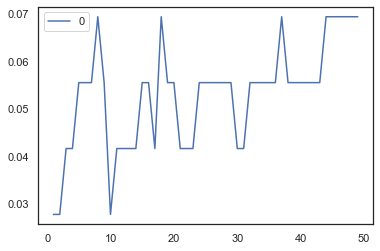

In [73]:
ks_df = pd.DataFrame.from_dict(ks, orient='index')
ks_df.plot()
print(f"Min k neighbours = {ks_df[0].idxmin()}")

In [74]:
'''
Rainforest
'''
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


regressor = RandomForestRegressor(n_estimators=1, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.583333333333334
Mean Squared Error: 176.88888888888889
Root Mean Squared Error: 13.299958228840001
